<a href="https://colab.research.google.com/github/ronil1508/SOC-2022_QML/blob/main/Quantum_Teleportation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [114]:
!pip install qiskit



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [115]:
from qiskit import QuantumCircuit, assemble, Aer, transpile, IBMQ
import numpy as np
from qiskit.visualization import plot_histogram, plot_bloch_vector, array_to_latex, plot_bloch_multivector
from math import sqrt, pi
from IPython.display import display, Math
from qiskit.quantum_info import random_statevector
from qiskit.ignis.verification import marginal_counts


<IPython.core.display.Latex object>

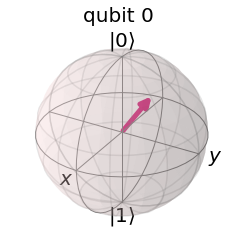

In [116]:
qc = QuantumCircuit(3,2)
psi = random_statevector(2)
display(array_to_latex(psi, prefix="|\\psi\\rangle ="))
plot_bloch_multivector(psi)

In [117]:
#we start by creating a bell state 
qc.h(1)
qc.cx(1,2)
qc.draw()

q_0: ──────────
     ┌───┐     
q_1: ┤ H ├──■──
     └───┘┌─┴─┐
q_2: ─────┤ X ├
          └───┘
c: 2/══════════

In [118]:
qc.initialize(psi, 0)
qc.cx(0,1)
qc.h(0)
qc.draw()
qc.measure(0,0)
qc.measure(1,1)
qc.draw()


┌────────────────────────────────────────────────┐          ┌───┐┌─┐
q_0: ┤ Initialize(0.50797+0.49722j,-0.43321-0.55414j) ├───────■──┤ H ├┤M├
     └─────────────────────┬───┬──────────────────────┘     ┌─┴─┐└┬─┬┘└╥┘
q_1: ──────────────────────┤ H ├─────────────────────────■──┤ X ├─┤M├──╫─
                           └───┘                       ┌─┴─┐└───┘ └╥┘  ║ 
q_2: ──────────────────────────────────────────────────┤ X ├───────╫───╫─
                                                       └───┘       ║   ║ 
c: 2/══════════════════════════════════════════════════════════════╩═══╩═
                                                                   1   0

In [119]:
qc.x(2).c_if(1, 1)
qc.z(2).c_if(0, 1)
qc.draw()

┌────────────────────────────────────────────────┐          ┌───┐┌─┐»
q_0: ┤ Initialize(0.50797+0.49722j,-0.43321-0.55414j) ├───────■──┤ H ├┤M├»
     └─────────────────────┬───┬──────────────────────┘     ┌─┴─┐└┬─┬┘└╥┘»
q_1: ──────────────────────┤ H ├─────────────────────────■──┤ X ├─┤M├──╫─»
                           └───┘                       ┌─┴─┐└───┘ └╥┘  ║ »
q_2: ──────────────────────────────────────────────────┤ X ├───────╫───╫─»
                                                       └───┘       ║   ║ »
c: 2/══════════════════════════════════════════════════════════════╩═══╩═»
                                                                   1   0 »
«                           
«q_0: ──────────────────────
«                           
«q_1: ──────────────────────
«        ┌───┐      ┌───┐   
«q_2: ───┤ X ├──────┤ Z ├───
«        └─╥─┘      └─╥─┘   
«     ┌────╨────┐┌────╨────┐
«c: 2/╡ c_1=0x1 ╞╡ c_0=0x1 ╞
«     └─────────┘└─────────┘

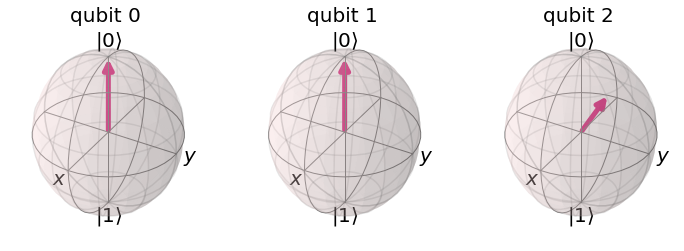

In [120]:
qc_sim = Aer.get_backend('aer_simulator')
qc.save_statevector()
out_vector = qc_sim.run(qc).result().get_statevector()
plot_bloch_multivector(out_vector)


In [121]:
qobj = assemble(qc)
result = qc_sim.run(qobj).result()
final_state = result.get_statevector()
array_to_latex(final_state,prefix = "\\state vector =}")


<IPython.core.display.Latex object>